##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:***
6
---
(*In Title case, separated with commas*)
***Full names of all students in the team:***
Isha Pargaonkar, Vidhi Chetan Shah, Vipanchi Dixit, Shreenidhi Ramaswamy, Shramana Ghosh
---
(*Separated by commas*)
***Id number of all students in the team:***
2021A3PS2803H, 2021A3PS2645H, 2021A3PS2983H, 2021A3PS0946H, 2021A7PS1834H

Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Air_Quality.csv')
df.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


In [5]:
df=pd.read_csv('Air_Quality.csv',sep=";", decimal=",",header=0)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [6]:
df.shape

(9471, 17)

In [7]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [9]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# **HANDLING NULL/NA VALUES**

In [10]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [11]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

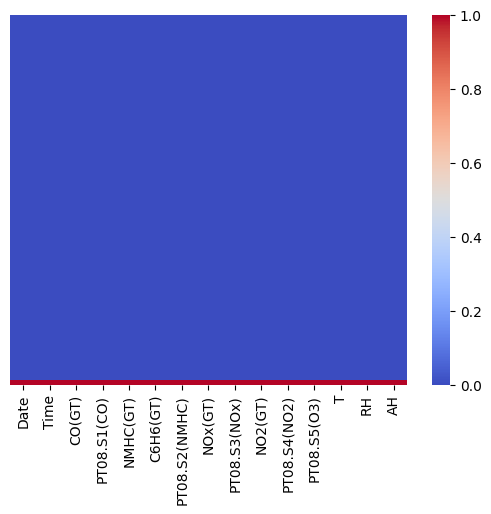

In [12]:
sns.heatmap(df.isna(),yticklabels=False,cmap='coolwarm')
plt.show()
# this shows that the last 114 rows have na values

In [13]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.dropna(inplace=True)
df.tail()
#dropping na rows(all last 114 rows have na values) because we have a large dataset and dropping those rows will not affect the dataset a lot

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [15]:
df.replace(to_replace=-200,value=np.nan,inplace=True)
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


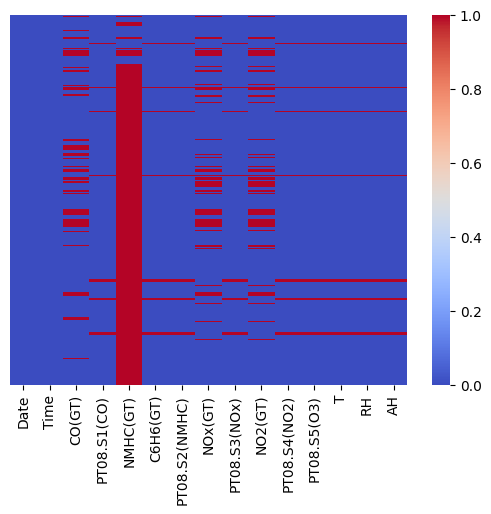

In [16]:
sns.heatmap(df.isna(),yticklabels=False,cmap='coolwarm')
plt.show()
#showing nan values

In [17]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

As we can see NMHC(GT) column has 8443 missing values out of 9357 rows. Therefore, we drop the column so it does not affect the output.


In [18]:
df.drop(columns=['NMHC(GT)'],inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [19]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [20]:
column=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']
for i in column:
  df[i]=df[i].fillna(df[i].mean())
df.isna().sum()
#we can see that there are no more null values in the dataset

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# **HANDLING OUTLIERS**

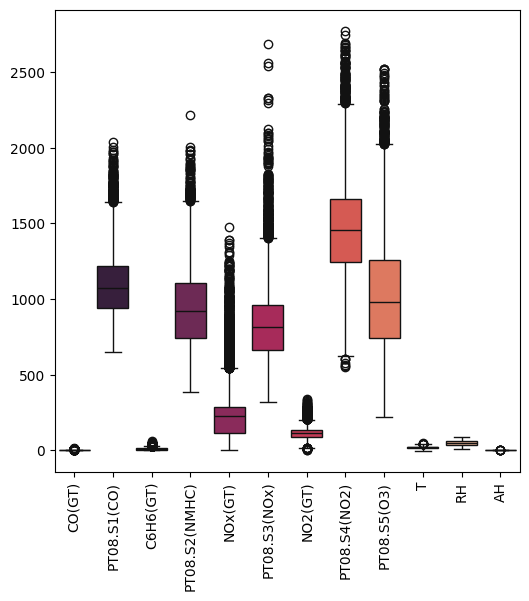

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,palette='rocket')
plt.xticks(rotation='vertical')
plt.show()
#whiskers are the lines extending from either side of box, points outside those whiskers are outliers

**USING IQR METHOD TO HANDLE OUTLIERS**

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [23]:
#finding outliers in the data
outliers=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers

NameError: name 'Q1' is not defined

In [657]:
outliers.columns

Index(['AH', 'C6H6(GT)', 'CO(GT)', 'Date', 'NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH',
       'T', 'Time'],
      dtype='object')

In [24]:
column_outlier=['AH', 'C6H6(GT)', 'CO(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH',
       'T']
for i in column_outlier:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[outliers[i], i] = temp
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
#no more outliers in the dataset, have replaced outliers with median values. We have not used mean as the mean itself is influenced by the outliers

NameError: name 'outliers' is not defined

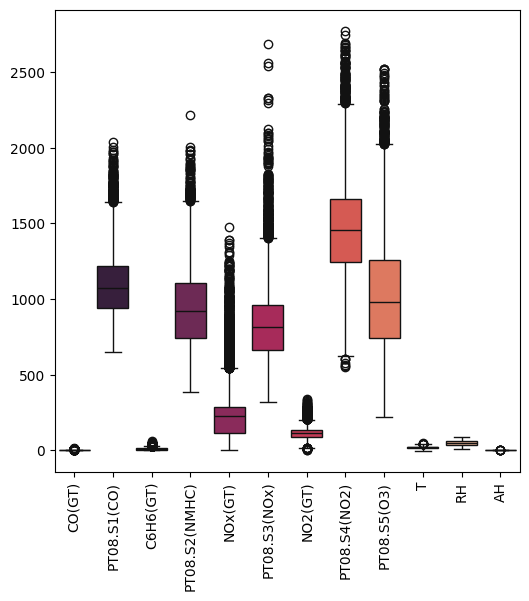

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,palette='rocket')
plt.xticks(rotation='vertical')
plt.show()
#we can see that the number of points outside the whiskers have reduced, indicating outliers have been handled

In [27]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

ValueError: could not convert string to float: '10/03/2004'

<Figure size 900x500 with 0 Axes>

From the above heatmap we see:
1. The polutants CO, C6H6 have the highest correlation with other features.
2. These two are followed by NOx, No2 having the next best correlation with other features.
3. AH,T,RH have low correlation with almost all the features.

Therefore we use the pollutants with highest correlation as features. However, a clear range for C6H6 to calculate its AQI subindex could not be found and hence it has not been used as a feature.

In [29]:
#calculate subindex of CO
def CO_AQI_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO(GT)"].apply(lambda x: CO_AQI_subindex(x))

In [30]:
##calculate subindex of NO2
def NO2_AQI_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO2_SubIndex"] = df["NO2(GT)"].apply(lambda x: NO2_AQI_subindex(x))

In [33]:
##calculate subindex of NOx
def NOx_AQI_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx(GT)"].apply(lambda x: NOx_AQI_subindex(x))

In [34]:
#calculating AQI
df["AQI"] = round(df[["NO2_SubIndex", "CO_SubIndex", "NOx_SubIndex"]].max(axis = 1))

In [35]:
#discretizing air quality
def air_qual(x):
      if 0<=x<=50:
        return 1
      elif x<=100:
        return 2
      elif x<=200:
        return 3
      elif x<=300:
        return 4
      elif x<=400:
        return 5
      elif x>400:
        return 6

df["Air Quality"] = df["AQI"].apply(lambda x: air_qual(x))



1-Good
2-Satisfactory
3-Moderately polluted
4-Poor
5-Very Poor
6-Severe

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
 14  CO_SubIndex    9357 non-null   float64
 15  NO2_SubIndex   9357 non-null   float64
 16  NOx_SubIndex   9357 non-null   float64
 17  AQI            9357 non-null   float64
 18  Air Quality  

In [667]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_SubIndex,NO2_SubIndex,NOx_SubIndex,AQI,Air Quality
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,107.5,133.0,186.0,186.0,3
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,100.0,112.0,123.0,123.0,3
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,102.5,134.0,151.0,151.0,3
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,102.5,142.0,192.0,192.0,3
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,80.0,136.0,151.0,151.0,3


# ***2. ML Model 1***

# KNN

In [37]:
y = df['Air Quality'].values
features = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']
X = df[features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [38]:
from collections import Counter

# calculating euclidean distance
def euclidean_distance(x1, x2):
      dist = np.sqrt(np.sum((x1-x2)**2))
      return dist

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred

    def _predict(self, x):
        # computing the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # getting the closest k
        k_indices = np.argsort(distances)[:self.k]
        KNearest_labels = [self.y_train[i] for i in k_indices]

        # calculating the majority vote
        most_common = Counter(KNearest_labels).most_common()
        return most_common[0][0]

In [39]:
# performing classification using KNN
KClassifier = KNN(k=50)
KClassifier.fit(X_train, y_train)
y_predicted = KClassifier.predict(X_test)

In [41]:
# calculating accuracy
accuracy = np.sum(y_predicted == y_test) / len(y_test)
print(accuracy)

0.9738247863247863


Another way in which model can be defined is by using a different distance metric. The k value has been chosen after careful consideration as a large k value can lead to oversmoothing while a small k can cause overfitting.  

# ***3. ML Model 2***



# Random Forest Classifier

In [42]:
columns = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
X = df[columns]# Features
X=X.values
Y = df['Air Quality'] # Target variable
Y=Y.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [43]:
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        # Checks if the node is a leaf node
        return self.value is not None


class DecisionTree:
    def __init__(self, min_split=2, max_depth=5, nooffeatures=None):
        self.min_split = min_split  # Minimum number of nodes required to split from previous nodes
        self.max_depth = max_depth  # Maximum depth till which the tree will grow
        self.nooffeatures = nooffeatures  # Number of features used during the construction of the decision tree
        self.root = None

    def fit(self, X, y):
        self.nooffeatures = X.shape[1] if not self.nooffeatures else min(X.shape[1], self.nooffeatures)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        noofsamples, nooffeats = X.shape
        n_labels = len(np.unique(y))

        # Check stopping conditions for creating a leaf node
        if depth >= self.max_depth or n_labels == 1 or noofsamples < self.min_split:
            leaf_value = self._most_common_label(y)  # Create a leaf node with the most common label as the value
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(nooffeats, self.nooffeatures, replace=False)
        best_feature, best_tsh = self._best_split(X, y, feat_idxs)  # Finds the best feature and threshold

        left_idxs, right_idxs = self._split(X[:, best_feature], best_tsh)  # Split the data based on the best feature and threshold
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)  # Repeatedly grow left and right subtree
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_tsh, left, right)  # Return the node with best split and its children

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1  # Initializes the best gain information to a minimum value
        split_idx, split_tsh = None, None  # Initialize the split index and threshold

        # Iterate through the selected feature indices
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            # Update gain
            for tsh in thresholds:
                gain = self._information_gain(y, X_column, tsh)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_tsh = tsh

        return split_idx, split_tsh  # Return the best split index and threshold

    def _information_gain(self, y, X_column, tsh):
        parent_entropy = self._entropy(y)  # Calculate the entropy of the parent node using y
        left_idxs, right_idxs = self._split(X_column, tsh)  # Split the data into left and right indices based on the given threshold

        # Check if one of the split sides is empty, return 0 if so (no information gain)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)  # Calculate the total number of samples and the number of samples in each split
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])  # Calculate the entropy of the left and right child nodes
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r  # Calculate the weighted average of the child node entropies

        # Calculate the information gain by subtracting child entropy from parent entropy
        information_gain = parent_entropy - child_entropy
        return information_gain  # Return the information gain

    def _split(self, X_column, tsh):  # Divide data into two groups based on a threshold
        left_idxs = np.argwhere(X_column <= tsh).flatten()
        right_idxs = np.argwhere(X_column > tsh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):  # Calculate entropy
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) if p > 0 else 0 for p in ps])

    def _most_common_label(self, y):  # Find the most common label in a set of labels
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        # Predict labels for each sample by traversing the tree
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        # Traverse the tree recursively to predict the label for a given sample x
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_trees=5, max_depth=2, min_split=2, nooffeatures=None):
        self.n_trees = n_trees  # Number of decision trees in the forest
        self.max_depth = max_depth  # Maximum depth of each decision tree
        self.min_split = min_split  # Minimum number of samples required to split a node in a tree
        self.nooffeatures = nooffeatures  # Number of features used during the construction of each decision tree
        self.trees = []  # List to store the decision trees created for the Random Forest

    def fit(self, X, y):
        # Trains the Random Forest classifier on the given input data
        self.trees = []
        for _ in range(self.n_trees):
            # Create a decision tree with specified parameters
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_split=self.min_split,
                nooffeatures=self.nooffeatures
            )

            # Create bootstrapped samples for training the tree
            X_sample, y_sample = self._bootstrap_samples(X, y)
            # Fit the decision tree on the bootstrapped samples
            tree.fit(X_sample, y_sample)
            # Add the trained tree to the list of trees in the Random Forest
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        # Create a bootstrapped sample from the given dataset (X, y)
        noofsamples = X.shape[0]  # Get the total number of samples in the dataset
        idxs = np.random.choice(noofsamples, noofsamples, replace=True)  # Randomly choose sample indices with replacement
        return X[idxs], y[idxs]  # Return the bootstrapped samples of features and labels

    def _most_common_label(self, y):
        # Determine the most common label in the given list of labels
        counter = Counter(y)  # Count occurrences of each label
        most_common = counter.most_common(1)[0][0]  # Get the most common label
        return most_common  # Return the most common label

    def predict(self, X):
        # Make predictions using the trained Random Forest classifier
        y_pred = np.array([tree.predict(X) for tree in self.trees])  # Get predictions from each tree
        tree_preds = np.swapaxes(y_pred, 0, 1)  # Transpose predictions for easier handling
        y_pred = np.array([self._most_common_label(pred) for pred in tree_preds])  # Get most common label
        return y_pred  # Return the final predicted labels


In [44]:
random_forest = RandomForest(n_trees=5)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8258547008547008


GINI Impurity, a measure of how randomly chosen elements would be incorrectly classified, can be used as a splitting criterion in Decision Trees in place of entropy guiding its splitting process. This results in a more effecient and faster tree building.

# ***4. ML Model 3***

# Naive Bayes Classifier

In [678]:
y = df['Air Quality'].values
features = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']
X = df[features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [679]:
#creating a Naive bayes class
class NaiveBayes:

    #fitting the model
    def fit(self, X, y):
        samples, features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # calculate mean, var, and prior for each class
        self.mean = np.zeros((n_classes, features), dtype=np.float64)
        self.var = np.zeros((n_classes, features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for index, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[index, :] = X_c.mean(axis=0)
            self.var[index, :] = X_c.var(axis=0)
            self.priors[index] = X_c.shape[0] / float(samples)


    def predict(self, X,noise_factor):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        probab = []

        # calculate posterior probability for each class
        for index, c in enumerate(self.classes):
            prior = np.log(self.priors[index])
            posterior = np.sum(np.log(self.pdf(index, x)))
            posterior = posterior + prior
            probab.append(posterior)

        # introduce randomness by adding noise to the posteriors to see how to affects model performance
        probab_with_noise = np.array(probab) + np.random.normal(scale=noise_factor, size=len(probab))

        # return class with the highest posterior probability with noise added
        return self.classes[np.argmax(probab_with_noise)]

    #calculating proability distribution
    def pdf(self, class_index, x):
        mean = self.mean[class_index]
        var = self.var[class_index]
        num = np.exp(-((x - mean) ** 2) / (2 * var))
        denom = np.sqrt(2 * np.pi * var)
        return num / denom



In [680]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
naive_bayes = NaiveBayes()
naive_bayes.fit(X_train, y_train)
#accuracy with noise included
noise_factor=0.7
prediction =naive_bayes.predict(X_test, noise_factor)
print("Naive Bayes classification accuracy with noise", accuracy(y_test, prediction))
#accuracy without noise
noise_factor=0
y_pred =naive_bayes.predict(X_test, noise_factor)
print("Naive Bayes classification accuracy without noise", accuracy(y_test, y_pred))

<ipython-input-679-83462bc294f1>:32: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self.pdf(index, x)))


Naive Bayes classification accuracy with noise 0.936965811965812
Naive Bayes classification accuracy without noise 0.9481837606837606


# ***5. ML Model 4 (Based on research literature)***

# Extreme Learning Machine

Papers cited at the end(in references)

#How does an ELM work
1. ELM is a neural network that consists of 1 hidden layer and has 2 sets of weights and biases.
2. The first weight and bias set are taken at random (so they are different each time the model is implemented)
3. An activation function is applied on the obtained data and a second set of weights and biases are applied on it
4. The second set of weights have been derived during the training phase

In [683]:
def sigmoid(x): #defining activation function
  return np.exp(x)/(1+np.exp(x))
#Defining our model
def ELM_train(X, y, L, wt1=None):

  M = np.size(X, axis=0) # Number of examples #rows
  N = np.size(X, axis=1) # Number of features #columns

  # If w1 is defined as random weights
  if wt1 is None:
    wt1 = np.random.uniform(low=-1, high=1, size=(L, N+1)) # Weights with bias 15x4

  bias = np.ones(M).reshape(-1, 1) # Bias definition
  X2 = np.concatenate((bias, X), axis=1) # Input with bias

  S = X2.dot(wt1.T) # Weighted sum of hidden layer
  H = sigmoid(S) # Activation function f(x) = sigmoid(x)

  bias = np.ones(M).reshape(-1, 1) # Bias definition
  H2 = np.concatenate((bias, H), axis=1) # Activation function with bias

  wt2 = (np.linalg.pinv(H2).dot(y)).T # computing 2nd set of weights (bias included)
  return wt2,wt1

#classification of test data
def ELM_test(X,wt2,wt1):
    M = np.size(X, axis=0) # Number of examples (rows)
    N = np.size(X, axis=1) # Number of features (columns)
    bias = np.ones(M).reshape(-1, 1)
    X2 = np.concatenate((bias, X), axis=1) #applying the method used to train data on the test sample
    H = sigmoid(X2.dot(wt1.T))
    H2 = np.concatenate((bias, H), axis=1)
    y = H2.dot(wt2.T) # obtaining predicted values of y
    return y

#defining function for calculating accuracy
def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred) # mean of the elements that are equal

#define features and target matrix
y = df['Air Quality']

# Select only the desired features from the DataFrame
features = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']
X = df[features]

#train test split
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#obtaining weights wt1 and wtt2
wt2,wt1=ELM_train(X_train,y_train,150)
y_pred = ELM_test(X_test,wt2,wt1)

#rounding off the class values
y_final = np.clip(np.round(y_pred), 1, 6).astype(int)

#printing accuracy
accuracy = accuracy(y_test,y_final)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7670940170940171


From literature survey we learnt:
1. ELMs are computationally fast, since the learning parameters are not iteratively obtained.
2. It can be used to train single hidden layer feedforward neural networks(FNN)
3. However it is not as efficient for higher dimensional data.

# ***6. Comparison of insights drawn from the models***

Out of all the models we can see that K nearest neighbours classifier gievs the best accuracy, of around 97%. This could be because the model is non paramteric allowing it to be more flexible, it is robust to noise and outliers, and can adapt to changes in data easily.

This is followed by Naive Bayes with an accuracy of 94%. The reasons for this could be because it is comparitively more insensitive to irrelevent features or noisy data, it can naturally adapt for multiclass classification and presence of independence among features if dataset.

Next is random forest with an accuracy of around 85%, it includes multiple decision trees and that reduces the risk of overfitting and it is rather insensitive to feature scaling.

The model of ELM has a varying accuracy between 65-80%. This large range is because the weights and biases for first iterations are chosen randomly in each run. It is

For large datasets, like ours, KNN can be computationally expensive. Even in our code it is taking approximately 2 mins to run. Therefore, we can conclude that the best classifier for our data is the Naive Bayes classifier.


# **_7. References_**

1.   [AQI](https://pib.gov.in/newsite/printrelease.aspx?relid=110654)
2.   [Naive Bayes Classifier](https://www.youtube.com/watch?v=TLInuAorxqE)
3. [Random Forest](https://youtu.be/eM4uJ6XGnSM?si=8pn2zAOa6dODNTHR)
4. [KNN Classifier](https://www.youtube.com/watch?v=4HKqjENq9OU)
5. H. Patil and K. Sharma, "Extreme Learning Machine: A Comprehensive Survey of Theories & Algorithms," 2023 International Conference on Computational Intelligence and Sustainable Engineering Solutions (CISES), Greater Noida, India, 2023, pp. 749-756, doi: 10.1109/CISES58720.2023.10183613.
6. Sun, Xia, Jingting Xu, Changmeng Jiang, Jun Feng, Su-Shing Chen, and Feijuan He. 2016. "Extreme Learning Machine for Multi-Label Classification" Entropy 18, no. 6: 225. https://doi.org/10.3390/e18060225
